34552.96820860612


/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Basecase:
Percentage EV's van Auto's: 0.9268707482993197
Hoeveelheid totale Subsidie: 1743038.0647914528
Percentage late majority met EV: 0.9077669902912622
Percentage laggards met EV: 0.9285714285714286

Beleid 1:
Percentage EV's van Auto's: 0.9228187919463087
Hoeveelheid totale Subsidie: 613000.0
Percentage late majority met EV: 0.9104477611940298
Percentage laggards met EV: 0.9690721649484536

Beleid 2:
Percentage EV's van Auto's: 0.9264214046822743
Hoeveelheid totale Subsidie: 927538.5832921222
Percentage late majority met EV: 0.9257425742574258
Percentage laggards met EV: 0.9285714285714286

Basecase:
Percentage EV's van Auto's: 0.9358288770053476
Hoeveelheid totale Subsidie: 1670439.2599092927
Percentage late majority met EV: 0.9226804123711341
Percentage laggards met EV: 0.9340659340659341

Beleid 1:
Percentage EV's van Auto's: 0.9264957264957265
Hoeveelheid totale Subsidie: 649700.0
Percentage late majority met EV: 0.9187817258883249
Percentage laggards met EV: 0.94897959183673

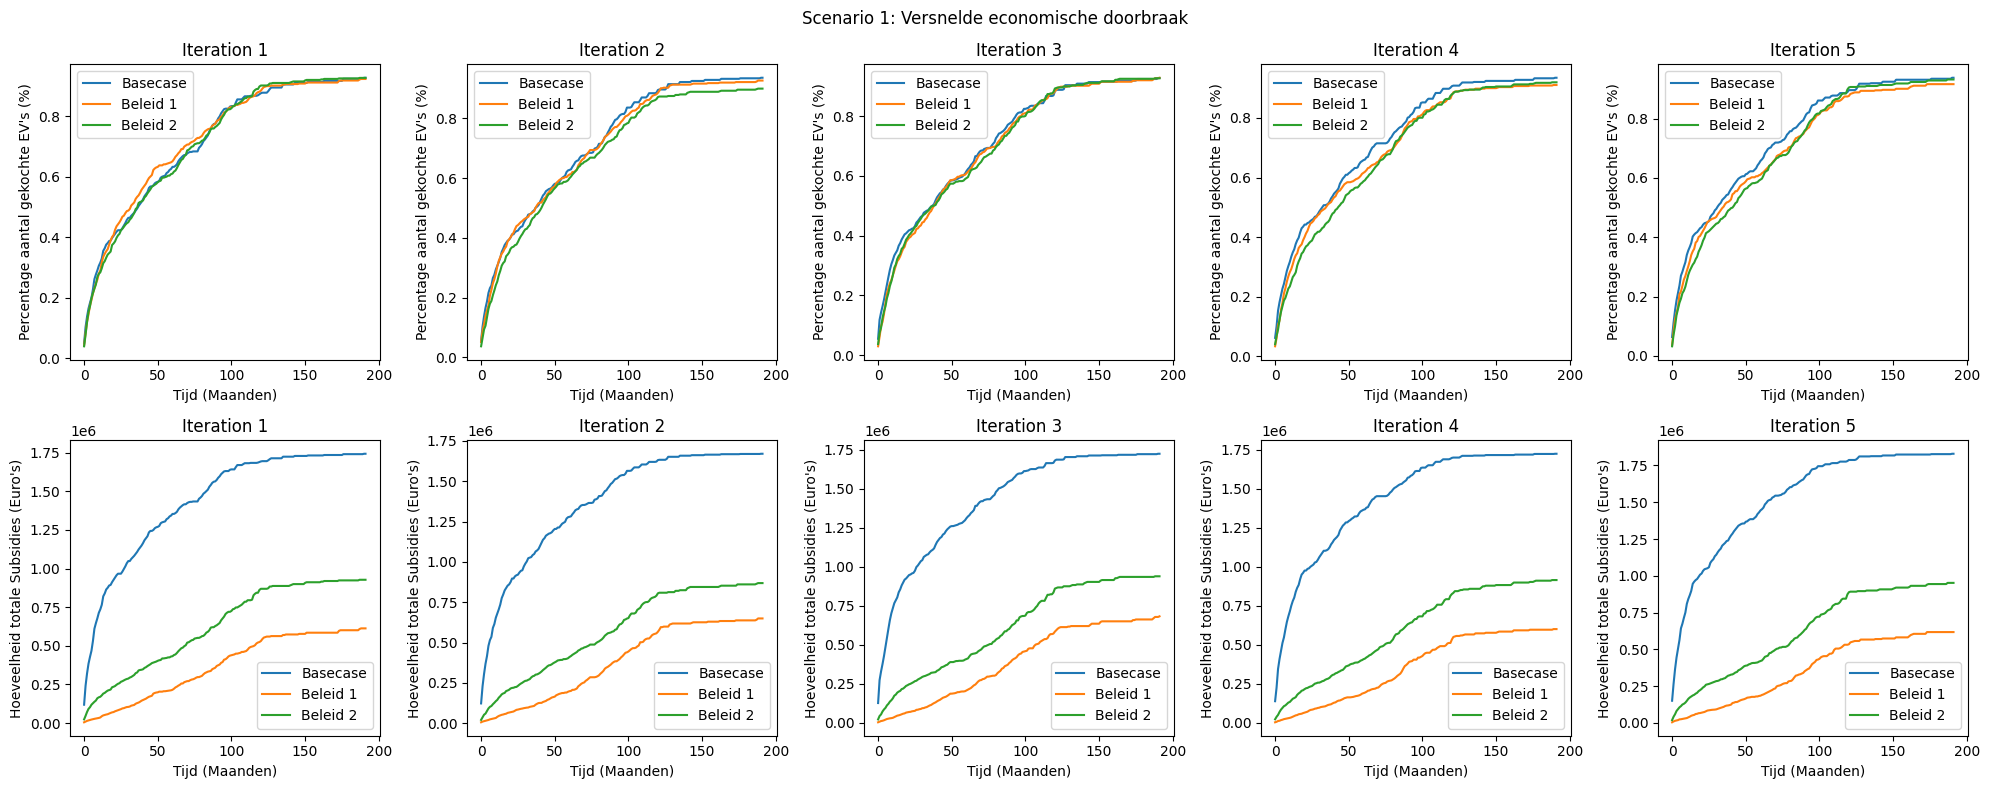

In [1]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

scenario1 = [32000, 396000] # versnelde economische doorbraak
scenario2 = [40000, 33000] # basis scenario
scenario3 = [48000, 26400] # Innovatie crisis

aantal_iteraties = 5

fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 1 rij, 5 kolommen


avg_percentage_ev = np.zeros((aantal_iteraties))



for iteratie in range(aantal_iteraties):
    ev = scenario1[0]
    fba = scenario1[1]

    model1 = SubsidieModel(ev, fba)
    model2 = SubsidieModel2(ev, fba)
    model3 = SubsidieModel3(ev, fba)
    for j in range(192):
        model1.step()
        model2.step()
        model3.step()

        
    base_case1 = model1.datacollector.get_model_vars_dataframe()
    beleid1_1 = model2.datacollector.get_model_vars_dataframe()
    beleid2_1 = model3.datacollector.get_model_vars_dataframe()
    
    x = range(len(base_case1))

    datasets = [base_case1, beleid1_1, beleid2_1]
    labels = ['Basecase', 'Beleid 1', 'Beleid 2']


    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percentage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    axs[0, iteratie].plot(x, base_case1["Percentage EV's van Auto's"], label='Basecase')
    axs[0, iteratie].plot(x, beleid1_1["Percentage EV's van Auto's"], label='Beleid 1')
    axs[0, iteratie].plot(x, beleid2_1["Percentage EV's van Auto's"], label='Beleid 2')

    axs[0, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[0, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[0, iteratie].set_ylabel('Percentage aantal gekochte EV\'s (%)')  
    axs[0, iteratie].legend() 

    axs[1, iteratie].plot(x, base_case1["Hoeveelheid totale Subsidie"], label='Basecase')
    axs[1, iteratie].plot(x, beleid1_1["Hoeveelheid totale Subsidie"], label='Beleid 1')
    axs[1, iteratie].plot(x, beleid2_1["Hoeveelheid totale Subsidie"], label='Beleid 2')

    axs[1, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[1, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[1, iteratie].set_ylabel('Hoeveelheid totale Subsidies (Euro\'s)')  
    axs[1, iteratie].legend() 

plt.suptitle("Scenario 1: Versnelde economische doorbraak")
plt.tight_layout()
plt.show()

Basecase:
Percentage EV's van Auto's: 0.8984238178633975
Hoeveelheid totale Subsidie: 1386627.767209278
Percentage late majority met EV: 0.8808290155440415
Percentage laggards met EV: 0.9325842696629213

Beleid 1:
Percentage EV's van Auto's: 0.9066901408450704
Hoeveelheid totale Subsidie: 973300.0
Percentage late majority met EV: 0.8814432989690721
Percentage laggards met EV: 0.8817204301075269

Beleid 2:
Percentage EV's van Auto's: 0.9142857142857143
Hoeveelheid totale Subsidie: 1300519.986803874
Percentage late majority met EV: 0.9182692307692307
Percentage laggards met EV: 0.9120879120879121

Basecase:
Percentage EV's van Auto's: 0.8886925795053003
Hoeveelheid totale Subsidie: 1382100.984710291
Percentage late majority met EV: 0.8907103825136612
Percentage laggards met EV: 0.9222222222222223

Beleid 1:
Percentage EV's van Auto's: 0.9086206896551724
Hoeveelheid totale Subsidie: 1064700.0
Percentage late majority met EV: 0.8872549019607843
Percentage laggards met EV: 0.902173913043478

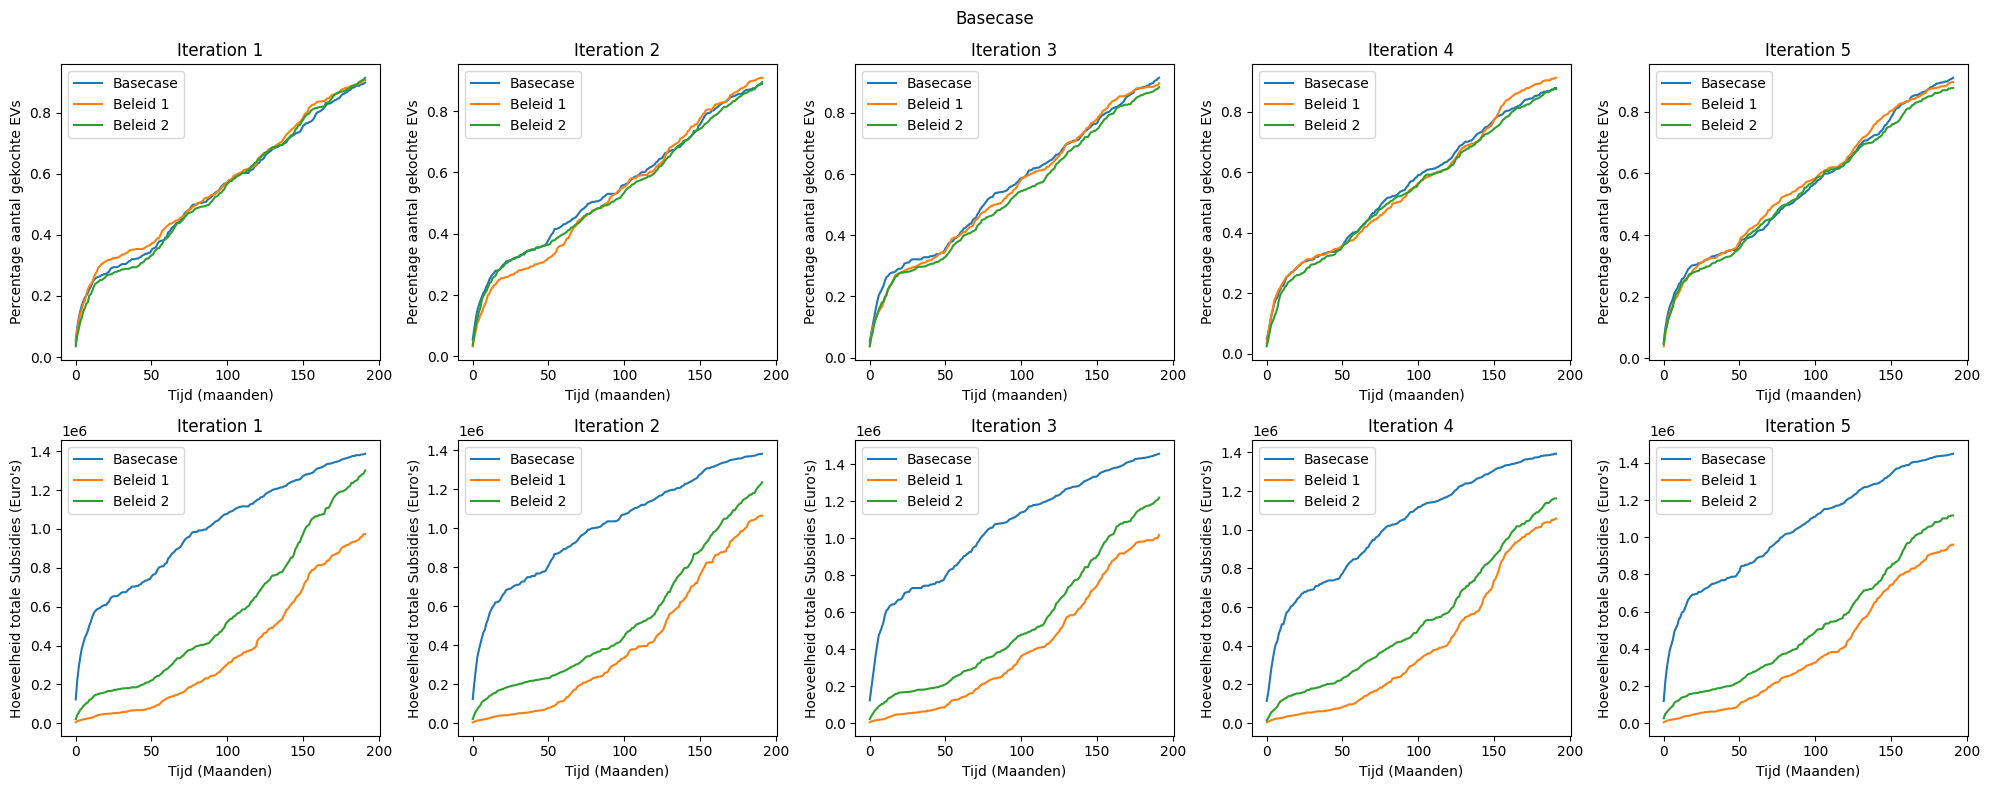

In [2]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 1 rij, 5 kolommen


avg_percentage_ev2 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario2[0]
    fba = scenario2[1]

    model4 = SubsidieModel(ev, fba)
    model5 = SubsidieModel2(ev, fba)
    model6 = SubsidieModel3(ev, fba)
    for j in range(192):
        model4.step()
        model5.step()
        model6.step()

        
    basecase_0 = model4.datacollector.get_model_vars_dataframe()
    beleid1_0 = model5.datacollector.get_model_vars_dataframe()
    beleid2_0 = model6.datacollector.get_model_vars_dataframe()
    
    x = range(len(basecase_0 ))

    datasets = [basecase_0 , beleid1_0 , beleid2_0]

    labels = ['Basecase', 'Beleid 1', 'Beleid 2']

    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percentage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    axs[0, iteratie].plot(x, basecase_0["Percentage EV's van Auto's"], label='Basecase')
    axs[0, iteratie].plot(x, beleid1_0["Percentage EV's van Auto's"], label='Beleid 1')
    axs[0, iteratie].plot(x, beleid2_0["Percentage EV's van Auto's"], label='Beleid 2')

    axs[0, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[0, iteratie].set_xlabel('Tijd (maanden)')  
    axs[0, iteratie].set_ylabel('Percentage aantal gekochte EVs')  
    axs[0, iteratie].legend()

    axs[1, iteratie].plot(x, basecase_0["Hoeveelheid totale Subsidie"], label='Basecase')
    axs[1, iteratie].plot(x, beleid1_0["Hoeveelheid totale Subsidie"], label='Beleid 1')
    axs[1, iteratie].plot(x, beleid2_0["Hoeveelheid totale Subsidie"], label='Beleid 2')

    axs[1, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[1, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[1, iteratie].set_ylabel('Hoeveelheid totale Subsidies (Euro\'s)')
    axs[1, iteratie].legend()   

plt.suptitle("Basecase")
plt.tight_layout()
plt.show()

Basecase:
Percentage EV's van Auto's: 0.825
Hoeveelheid totale Subsidie: 1306713.7843994875
Percentage late majority met EV: 0.8075117370892019
Percentage laggards met EV: 0.7912087912087912

Beleid 1:
Percentage EV's van Auto's: 0.8122807017543859
Hoeveelheid totale Subsidie: 755200.0
Percentage late majority met EV: 0.7842105263157895
Percentage laggards met EV: 0.8313253012048193

Beleid 2:
Percentage EV's van Auto's: 0.8112874779541446
Hoeveelheid totale Subsidie: 958484.510833732
Percentage late majority met EV: 0.7789473684210526
Percentage laggards met EV: 0.851063829787234

Basecase:
Percentage EV's van Auto's: 0.8160136286201022
Hoeveelheid totale Subsidie: 1287064.7380250276
Percentage late majority met EV: 0.8190954773869347
Percentage laggards met EV: 0.8229166666666666

Beleid 1:
Percentage EV's van Auto's: 0.803448275862069
Hoeveelheid totale Subsidie: 778800.0
Percentage late majority met EV: 0.8009950248756219
Percentage laggards met EV: 0.7872340425531915

Beleid 2:
Pe

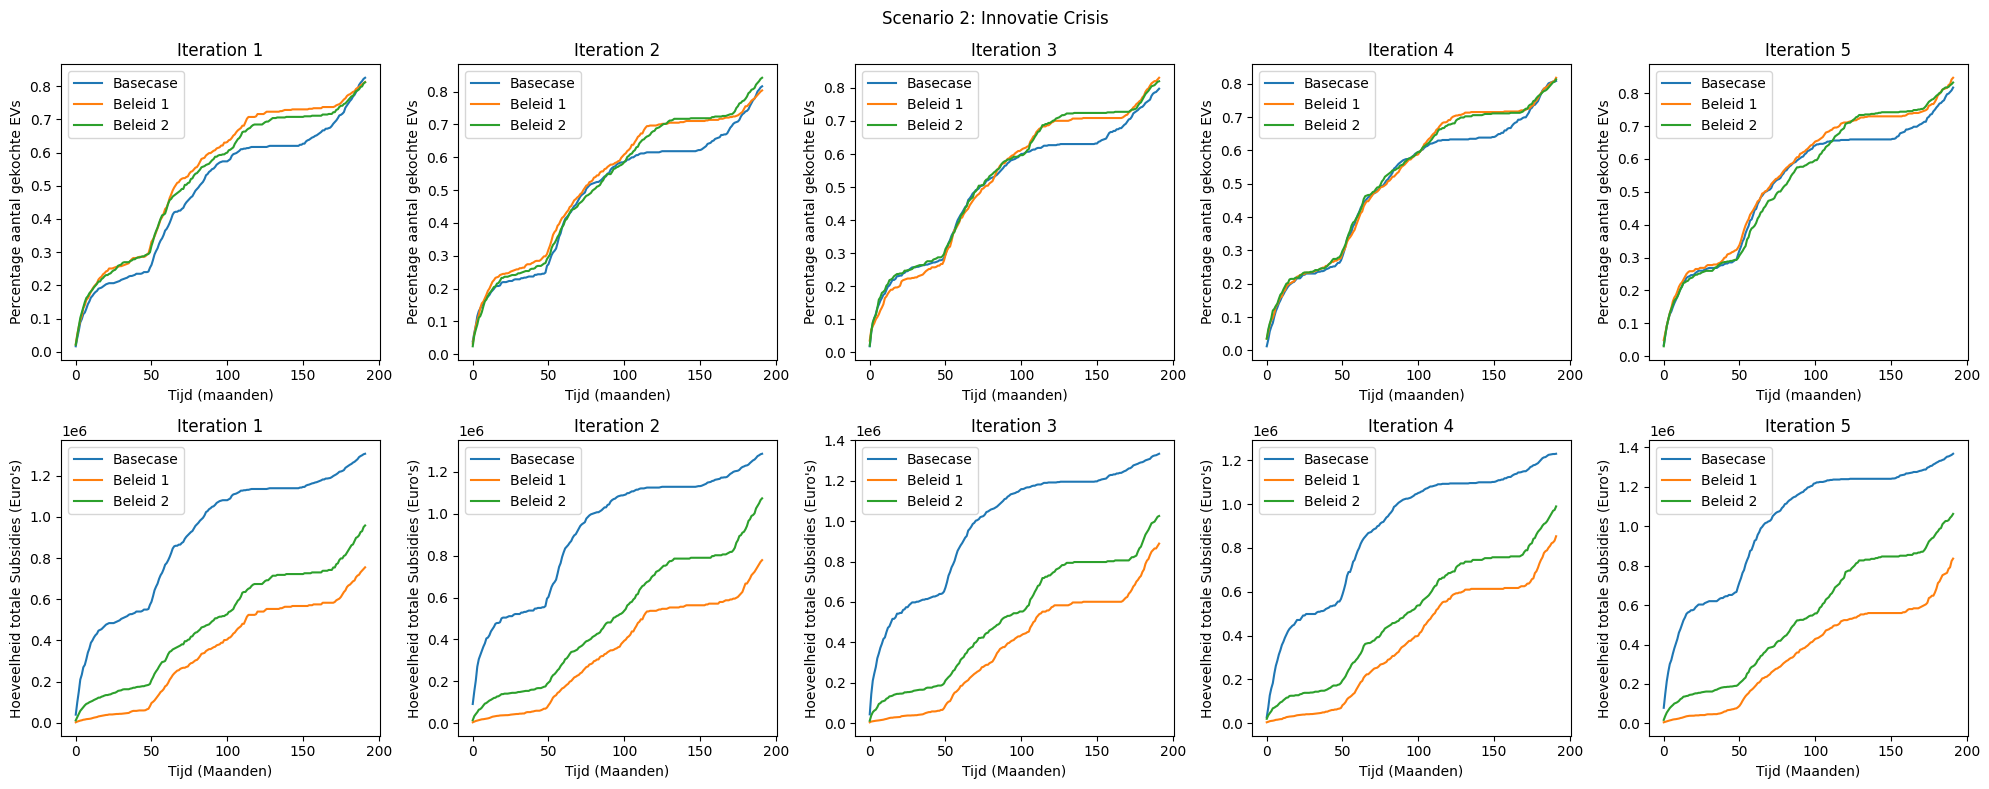

In [3]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 1 rij, 5 kolommen

avg_percentage_ev3 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario3[0]
    fba = scenario3[1]

    model7 = SubsidieModel(ev, fba)
    model8 = SubsidieModel2(ev, fba)
    model9 = SubsidieModel3(ev, fba)
    for j in range(192):
        model7.step()
        model8.step()
        model9.step()

        
    basecase_2 = model7.datacollector.get_model_vars_dataframe()
    beleid1_2 = model8.datacollector.get_model_vars_dataframe()
    beleid2_2 = model9.datacollector.get_model_vars_dataframe()
    
    x = range(len(basecase_2))

    datasets = [basecase_2, beleid1_2, beleid2_2]
    labels = ['Basecase', 'Beleid 1', 'Beleid 2']


    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percentage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    
    axs[0, iteratie].plot(x, basecase_2["Percentage EV's van Auto's"], label='Basecase')
    axs[0, iteratie].plot(x, beleid1_2["Percentage EV's van Auto's"], label='Beleid 1')
    axs[0, iteratie].plot(x, beleid2_2["Percentage EV's van Auto's"], label='Beleid 2')

    axs[0, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[0, iteratie].set_xlabel('Tijd (maanden)')  
    axs[0, iteratie].set_ylabel('Percentage aantal gekochte EVs')  
    axs[0, iteratie].legend() 

    axs[1, iteratie].plot(x, basecase_2["Hoeveelheid totale Subsidie"], label='Basecase')
    axs[1, iteratie].plot(x, beleid1_2["Hoeveelheid totale Subsidie"], label='Beleid 1')
    axs[1, iteratie].plot(x, beleid2_2["Hoeveelheid totale Subsidie"], label='Beleid 2')

    axs[1, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[1, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[1, iteratie].set_ylabel('Hoeveelheid totale Subsidies (Euro\'s)')  
    axs[1, iteratie].legend()

plt.suptitle("Scenario 2: Innovatie Crisis")
plt.tight_layout()
plt.show()